In [8]:
# Dependencies
import gzip
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from datetime import date
import datetime
import calendar
import holidays
from pprint import pprint
import calmap
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
# Import NYC Data
data_df = pd.read_csv('NYcalendar.csv.gz', nrows=100000, compression='gzip', error_bad_lines=False)
# Set Display Options
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)
pd.set_option('display.width', 100000)

In [10]:
# Current Value Formats
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
listing_id        100000 non-null int64
date              100000 non-null object
available         100000 non-null object
price             100000 non-null object
adjusted_price    100000 non-null object
minimum_nights    100000 non-null int64
maximum_nights    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [11]:
# Reformat Values
data_df=data_df.dropna()
data_df['price'] = data_df['price'].map(lambda x: x.lstrip('$'))
data_df['price'] = data_df['price'].str.replace(',', '')
data_df['year'] = data_df['date'].str[0:4]
data_df['month'] = data_df['date'].str[5:7]
data_df['day'] = data_df['date'].str[8:10]
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['price'] = pd.to_numeric(data_df['price'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
listing_id        100000 non-null int64
date              100000 non-null datetime64[ns]
available         100000 non-null object
price             100000 non-null float64
adjusted_price    100000 non-null object
minimum_nights    100000 non-null int64
maximum_nights    100000 non-null int64
year              100000 non-null object
month             100000 non-null object
day               100000 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.4+ MB


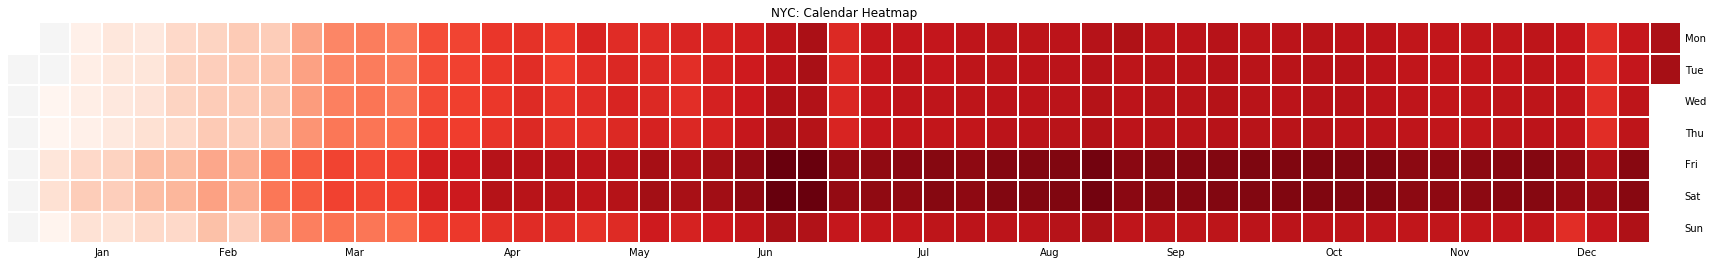

In [13]:
# Grouping by date for Calendar Heatmap
data_df_grouped = data_df.groupby('date').agg({'price':'mean'})
heatmap = pd.Series(data_df_grouped['price'], index=data_df_grouped.index)

# Plot Calendar Heatmap
f, ax = plt.subplots(1, 1, figsize = (30, 10))
calmap.yearplot(heatmap, year=2019, ax=ax)
plt.title("NYC: Calendar Heatmap")  
plt.savefig("NYC_Calendar_Heatmap.png")

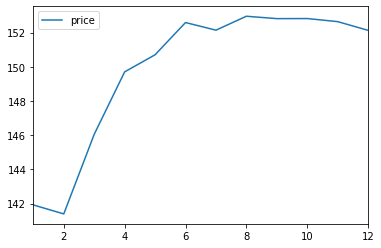

In [14]:
# Monthly Price Averages - I DID THIS DIFFERENTLY FROM BAR CHARTS BELOW. DOES NOT LOOK RIGHT. WILL REDO
data_df_avg = data_df.groupby(['month'], as_index=False)['price'].mean()
data_df_avg.index = data_df_avg.index+1
data_df_avg.plot()

In [15]:
# ID Day of Week and Holidays
us_holidays = holidays.US()
data_df['dayofweek']='default'
data_df['holiday']='False'
data_df['holiday_name']='working'
for index,row in data_df.iterrows():
    sdate = datetime.date(int(row['year']),int(row['month']),int(row['day']))
    vall=date(int(row['year']),int(row['month']),int(row['day'])) in us_holidays
    data_df.set_value(index,'dayofweek', calendar.day_name[sdate.weekday()])
    data_df.set_value(index,'holiday',vall)
    data_df.set_value(index,'holiday_name',us_holidays.get(sdate))

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [16]:
# Calc Avg Prices for DoW
DoW_df=data_df.groupby('dayofweek').price.mean()
DoW_df=DoW_df.reset_index()
DoW_df['day#']=0

for index,row in DoW_df.iterrows():
    if row['dayofweek']=='Monday':
        DoW_df.set_value(index,'day#',1)
    if row['dayofweek']=='Tuesday':
        DoW_df.set_value(index,'day#',2)
    if row['dayofweek']=='Wednesday':
        DoW_df.set_value(index,'day#',3)
    if row['dayofweek']=='Thursday':
        DoW_df.set_value(index,'day#',4)
    if row['dayofweek']=='Friday':
        DoW_df.set_value(index,'day#',5)
    if row['dayofweek']=='Saturday':
        DoW_df.set_value(index,'day#',6)
    if row['dayofweek']=='Sunday':
        DoW_df.set_value(index,'day#',7)
DoW_df=DoW_df.sort_values('day#',ascending=[1])
DoW_df=DoW_df.rename(columns={'price':'Average_Price'})
DoW_df

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,dayofweek,Average_Price,day#
1,Monday,149.153096,1
5,Tuesday,149.213393,2
6,Wednesday,149.073342,3
4,Thursday,149.098687,4
0,Friday,151.596827,5
2,Saturday,151.686952,6
3,Sunday,149.243016,7


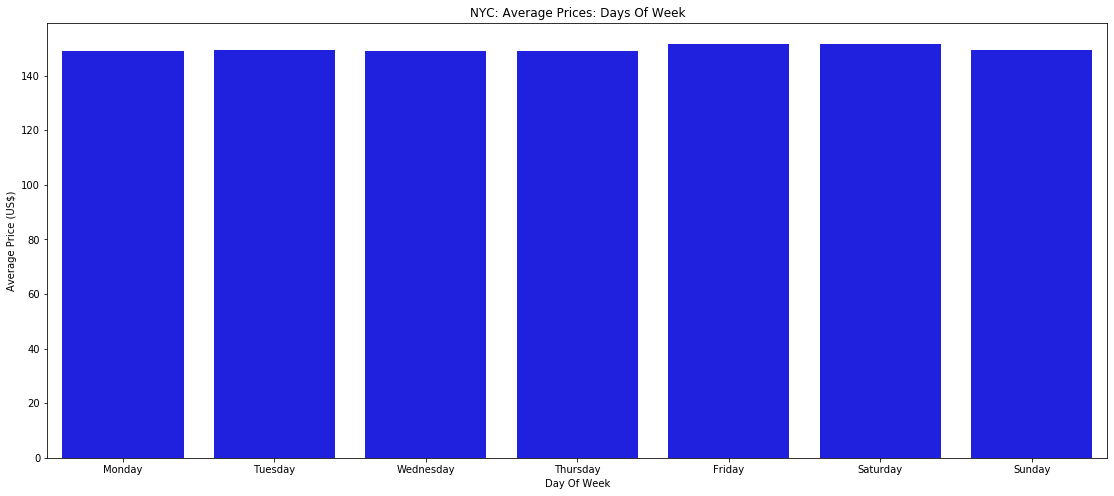

In [17]:
# Day of Week Prices
plt.figure(figsize=(19,8))
ax = sns.barplot("dayofweek", y="Average_Price", data=DoW_df,color="b")
ax.set(xlabel='Day Of Week', ylabel='Average Price (US$)')
plt.title("NYC: Average Prices: Days Of Week")  
plt.savefig("NYC Average Day Of Week Prices.png")

In [18]:
# Calc Avg Prices for Holidays
Hol_df=data_df.groupby('holiday_name').price.mean()
Hol_df=Hol_df.reset_index()
Hol_df['hol#']=0

for index,row in Hol_df.iterrows():
    if row['holiday_name']=="New Year's Day":
        Hol_df.set_value(index,'hol#',0)
    if row['holiday_name']=='Martin Luther King, Jr. Day':
        Hol_df.set_value(index,'hol#',1)
    if row['holiday_name']=="Presidents Day":
        Hol_df.set_value(index,'hol#',2)
    if row['holiday_name']=='Memorial Day':
        Hol_df.set_value(index,'hol#',3)
    if row['holiday_name']=='Independence Day':
        Hol_df.set_value(index,'hol#',4)
    if row['holiday_name']=='Labor Day':
        Hol_df.set_value(index,'hol#',5)
    if row['holiday_name']=='Columbus Day':
        Hol_df.set_value(index,'hol#',6)
    if row['holiday_name']=='Veterans Day':
        Hol_df.set_value(index,'hol#',7)
    if row['holiday_name']=="Veterans Day (Observed)":
        Hol_df.set_value(index,'hol#',8)
    if row['holiday_name']=='Thanksgiving':
        Hol_df.set_value(index,'hol#',9)
    if row['holiday_name']=='Christmas Day':
        Hol_df.set_value(index,'hol#',10)
Hol_df=Hol_df.sort_values('hol#',ascending=[1])
Hol_df=Hol_df.rename(columns={'price':'Average_Price'})
Hol_df

C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\stabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  

,holiday_name,Average_Price,hol#
6,New Year's Day,152.329670,0
9,Washington's Birthday,141.127737,0
4,"Martin Luther King, Jr. Day",139.076642,1
5,Memorial Day,150.248175,3
2,Independence Day,150.335766,4
3,Labor Day,152.726277,5
1,Columbus Day,152.149635,6
8,Veterans Day,151.686131,7
7,Thanksgiving,151.959854,9
0,Christmas Day,151.915751,10


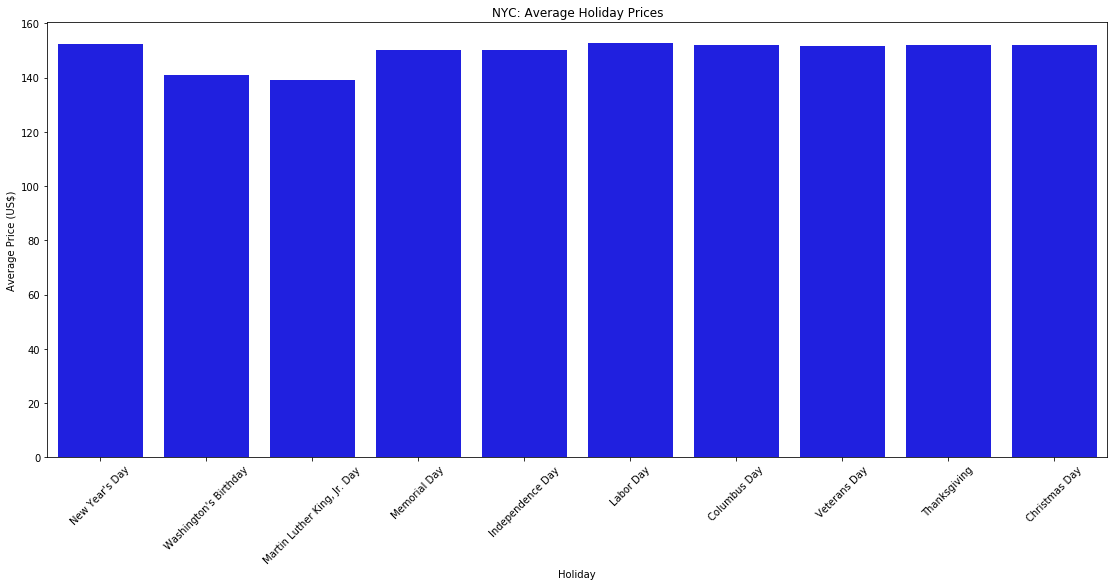

In [19]:
# Holiday Prices
plt.figure(figsize=(19,8))
ax = sns.barplot("holiday_name", y="Average_Price", data=Hol_df,color="b")
ax.set(xlabel='Holiday', ylabel='Average Price (US$)')
plt.xticks(rotation=45)
plt.title("NYC: Average Holiday Prices")  
plt.savefig("NYC_Holiday_Avgs.png")